### Importação dos dados



In [13]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja1 = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [17]:
loja1["loja"] = "Loja 1"
loja2["loja"] = "Loja 2"
loja3["loja"] = "Loja 3"
loja4["loja"] = "Loja 4"



In [19]:
df = pd.concat([loja1, loja2, loja3, loja4])


faturamento = df.groupby("loja")["Preço"].sum().sort_values(ascending=False)
print(faturamento)



loja
Loja 1    1534509.12
Loja 2    1488459.06
Loja 3    1464025.03
Loja 4    1384497.58
Name: Preço, dtype: float64


# 2. Vendas por Categoria


In [21]:
vendas_por_categoria = df.groupby(["loja", "Categoria do Produto"]).size().unstack().fillna(0).astype(int)
print(vendas_por_categoria)


Categoria do Produto  brinquedos  eletrodomesticos  eletronicos  \
loja                                                              
Loja 1                       324               312          448   
Loja 2                       313               305          422   
Loja 3                       315               278          451   
Loja 4                       338               254          451   

Categoria do Produto  esporte e lazer  instrumentos musicais  livros  moveis  \
loja                                                                           
Loja 1                            284                    182     173     465   
Loja 2                            275                    224     197     442   
Loja 3                            277                    177     185     499   
Loja 4                            277                    170     187     480   

Categoria do Produto  utilidades domesticas  
loja                                         
Loja 1                  

# 3. Média de Avaliação das Lojas

In [22]:
avaliacao_media = df.groupby("loja")["Avaliação da compra"].mean().round(2)
print(avaliacao_media)


loja
Loja 1    3.98
Loja 2    4.04
Loja 3    4.05
Loja 4    4.00
Name: Avaliação da compra, dtype: float64


# 4. Produtos Mais e Menos Vendidos

In [25]:
vendas_produtos = df.groupby(["loja", "Produto"]).size().reset_index(name="Quantidade")

def top_bottom_por_loja(loja_nome):
    dados_loja = vendas_produtos[vendas_produtos["loja"] == loja_nome]
    top5 = dados_loja.sort_values(by="Quantidade", ascending=False).head(5)
    bottom5 = dados_loja.sort_values(by="Quantidade", ascending=True).head(5)
    return top5, bottom5

for loja in df["loja"].unique():
    top, bottom = top_bottom_por_loja(loja)
    print(f"\nMais vendidos na {loja}:")
    print(top.to_string(index=False))
    print(f"\nMenos vendidos na {loja}:")
    print(bottom.to_string(index=False))



Mais vendidos na Loja 1:
  loja            Produto  Quantidade
Loja 1      TV Led UHD 4K          60
Loja 1        Micro-ondas          60
Loja 1      Guarda roupas          60
Loja 1 Secadora de roupas          58
Loja 1   Blocos de montar          56

Menos vendidos na Loja 1:
  loja                     Produto  Quantidade
Loja 1                Celular ABXY          33
Loja 1                     Headset          33
Loja 1           Panela de pressão          35
Loja 1                    Pandeiro          36
Loja 1 Ciência de dados com python          39

Mais vendidos na Loja 2:
  loja                  Produto  Quantidade
Loja 2 Iniciando em programação          65
Loja 2              Micro-ondas          62
Loja 2                  Bateria          61
Loja 2                   Violão          58
Loja 2                 Pandeiro          58

Menos vendidos na Loja 2:
  loja           Produto  Quantidade
Loja 2 Jogo de tabuleiro          32
Loja 2        Impressora          34
Loja 2   

# 5. Frete Médio por Loja


In [26]:
frete_medio = df.groupby("loja")["Frete"].mean().round(2)
print(frete_medio)


loja
Loja 1    34.69
Loja 2    33.62
Loja 3    33.07
Loja 4    31.28
Name: Frete, dtype: float64


# 6. Gráficos





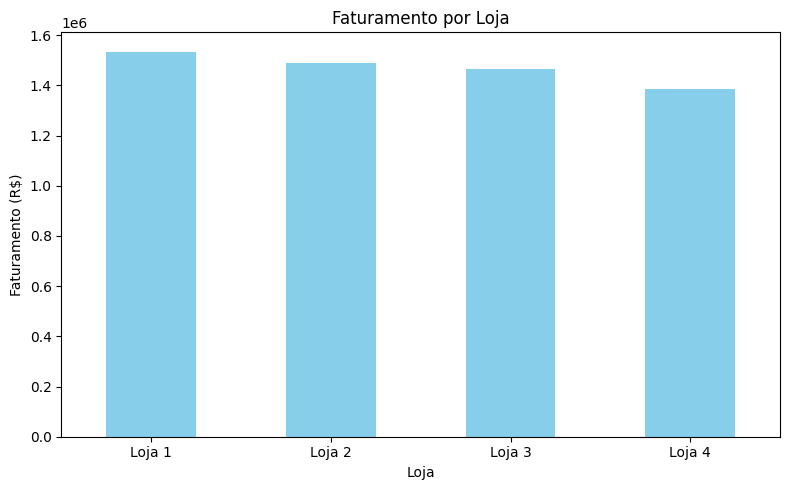

In [38]:
faturamento = df.groupby("loja")["Preço"].sum().sort_values(ascending=False)

faturamento.plot(kind="bar", color="skyblue", figsize=(8, 5))
plt.title("Faturamento por Loja")
plt.xlabel("Loja")
plt.ylabel("Faturamento (R$)")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

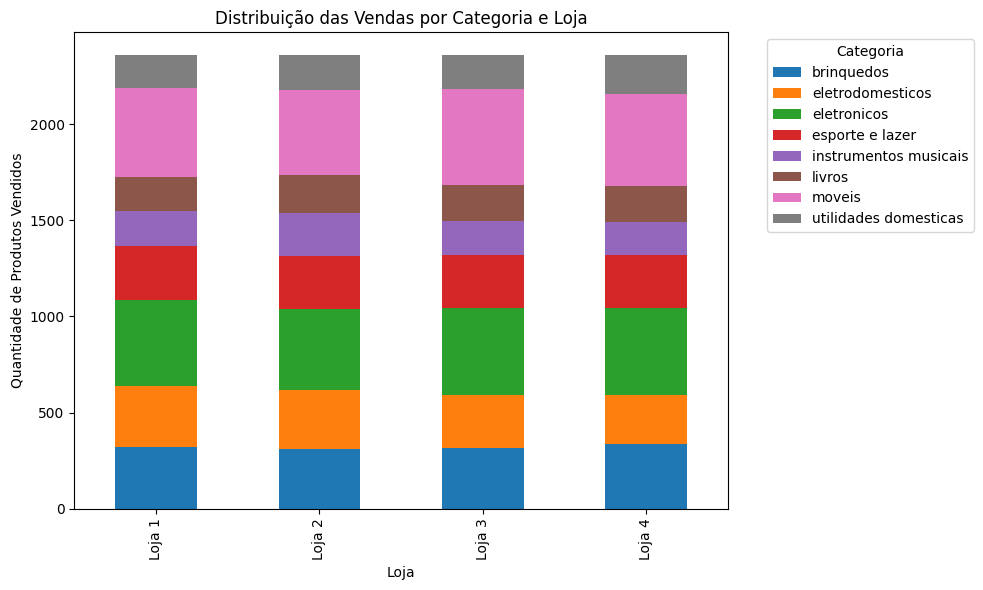

In [31]:
vendas_cat = df.groupby(["loja", "Categoria do Produto"]).size().unstack().fillna(0)

vendas_cat.plot(kind="bar", stacked=True, figsize=(10, 6))
plt.title("Distribuição das Vendas por Categoria e Loja")
plt.xlabel("Loja")
plt.ylabel("Quantidade de Produtos Vendidos")
plt.legend(title="Categoria", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


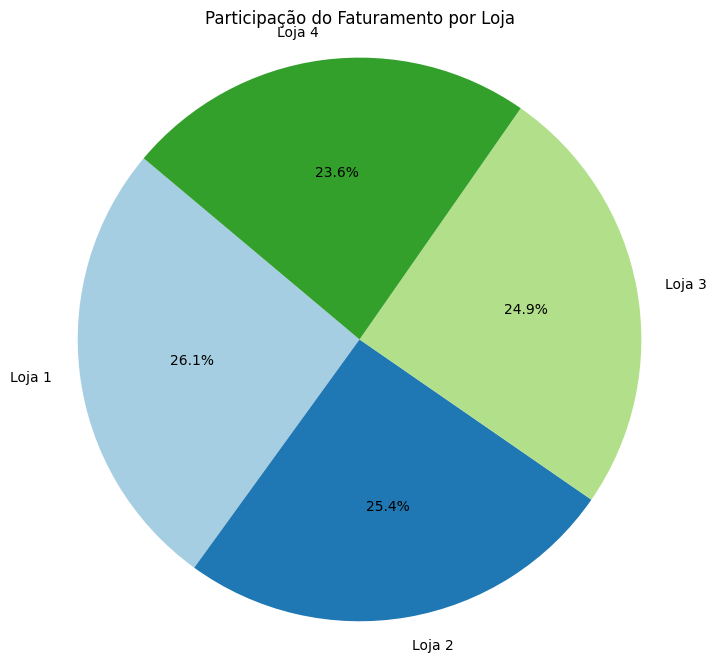

In [39]:
faturamento = df.groupby("loja")["Preço"].sum()

plt.figure(figsize=(8, 8))
plt.pie(faturamento, labels=faturamento.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title("Participação do Faturamento por Loja")
plt.axis('equal')
plt.show()


# 7. Relatório final


Relatório Final — Indicação de Loja para Priorizar (ou Descontinuar)
Introdução
Este relatório analisa quatro lojas do Senhor João, com o objetivo de identificar qual delas apresenta o melhor desempenho para concentrar as vendas e qual apresenta o pior desempenho, podendo ser descontinuada ou receber menos investimento.

Análise
Faturamento Total
Loja 1 tem o maior faturamento: R$ 1.534.509,12

Loja 4 tem o menor faturamento: R$ 1.384.497,58

Avaliação Média dos Clientes
Loja 3 tem a melhor avaliação: 4,05

Loja 1 tem a pior avaliação: 3,98

Frete Médio
Loja 4 tem o frete mais barato: R$ 31,28

Loja 1 tem o frete mais caro: R$ 34,69

Produtos e Categorias
Todas as lojas têm categorias similares, com móveis e eletrônicos entre as mais vendidas.

Os produtos menos vendidos estão mais presentes na Loja 1 e Loja 4.

Conclusão e Recomendação
Embora a Loja 1 apresente o maior faturamento, sua avaliação mais baixa e o frete mais caro indicam possíveis problemas de satisfação e custo para os clientes.

A Loja 4, apesar do frete mais barato, tem o menor faturamento, o que pode indicar baixo desempenho de vendas.

A Loja 3 destaca-se pela melhor avaliação e um faturamento próximo ao topo, além de um frete competitivo.

Portanto, a recomendação é:

Focar as vendas e investimentos principalmente nas Lojas 2 e 3, que equilibram faturamento, avaliação e custo de frete.

Avaliar a possibilidade de descontinuar ou reestruturar a Loja 4, devido ao menor faturamento.

Rever estratégias na Loja 1 para melhorar a satisfação do cliente e reduzir custos de frete, pois mesmo sendo a mais lucrativa, apresenta pontos fracos.

Assim, o Senhor João poderá otimizar seu portfólio e maximizar resultados focando nas lojas que oferecem melhor retorno e experiência ao cliente.